In [ ]:
!pip install sodapy

In [ ]:
from sodapy import Socrata

In [ ]:
source = Socrata("data.melbourne.vic.gov.au", None)
data = source.get("vh2v-4nfs", limit=2000)

In [ ]:
display(data)

In [ ]:
import pandas as pd
data1 = pd.DataFrame.from_records(data) #convert data into dataframes 

In [ ]:
display(data1)

In [ ]:
data1['status'] = data1['status'].map({'Present':0, 'Unoccupied':1})  #Replacing 'Present' and 'Unoccupied' with 0 and 1 

In [ ]:
display(data1)

In [ ]:
data1.info()     #check the datatype (Dtype)

In [ ]:
#Convert longitude and lattitude Dtype to float, because these columns will be used for plotting
data1['lon'] = data1['lon'].astype('float64')
data1['lat'] = data1['lat'].astype('float64')

In [ ]:
data1.info()

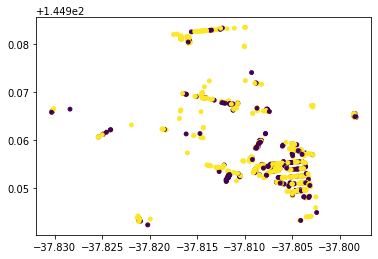

In [ ]:
#
import matplotlib.pyplot as plt
plt.scatter(data1['lat'], data1['lon'], s= 15, c= data1['status']) 
plt.show()

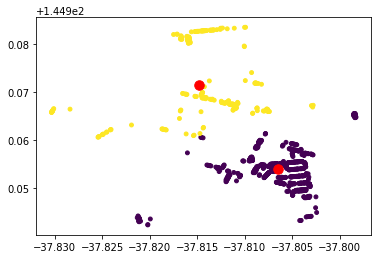

In [ ]:
#Kmeans Clustering
from sklearn.cluster import KMeans
data2 = data1[['lat', 'lon']]

kmeans = KMeans(n_clusters = 2).fit(data2) # n_clusters =2 means, the data will be divided into 2 clusters
centroids = kmeans.cluster_centers_
plt.scatter(data2['lat'],data2['lon'],c=kmeans.labels_, s=15)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=90 )
plt.show()

In [ ]:
print(data2['lat'].min())
print(data2['lat'].max())
print(data2['lon'].min())
print(data2['lon'].max())

-37.83031768271073
-37.79830151808934
144.94223168804564
144.9835105942471


In [ ]:
#Visualizing the data on map
import folium
Coordinates= data2.values
#print(Coordinates)
status=data1['status'].values
#print(status)
colors = []
for i in status:
    if i==0:
        colors.append("red")
    else:
        colors.append("blue")
map = folium.Map(location=[-37.83, 144.98], tiles='OpenStreetMap' , zoom_start=12)

for i in range(len(Coordinates)):
  #location = Coordinates[i]
  #popup = str(status[i])
  #marker = folium.Marker(location = location, popup = popup)
  #marker.add_to(map)
    folium.Marker(
        location=Coordinates[i],
        popup = data[i]['status'],  #click on datapoint to see whether the slot is occupied or not
        icon=folium.Icon(color=colors[i])
    ).add_to(map)

display(map)